### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
trainX.shape

(60000, 28, 28)

In [7]:
trainY.shape

(60000,)

In [8]:
testX.shape

(10000, 28, 28)

In [9]:
testY.shape

(10000,)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainX = trainX.astype('float32')
trainY = trainY.astype('float32')

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [12]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

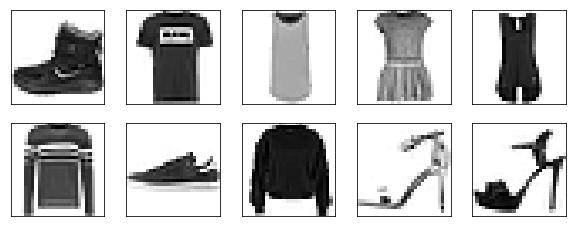

LABEL for each of the image  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [16]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    
plt.show()


print('LABEL for each of the image ', trainY[0:9])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

### Execute the model using model.fit()

In [20]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 24us/sample - loss: 2.8133 - acc: 0.1392 - val_loss: 19.3164 - val_acc: 0.1386
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 2.5631 - acc: 0.1663 - val_loss: 11.8917 - val_acc: 0.1621
Epoch 3/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.3530 - acc: 0.1980 - val_loss: 8.5393 - val_acc: 0.1881
Epoch 4/100
60000/60000 [==============================] - 1s 13us/sample - loss: 2.1767 - acc: 0.2342 - val_loss: 6.6137 - val_acc: 0.2208
Epoch 5/100
60000/60000 [==============================] - 1s 14us/sample - loss: 2.0286 - acc: 0.2732 - val_loss: 5.3892 - val_acc: 0.2517
Epoch 6/100
60000/60000 [==============================] - 1s 13us/sample - loss: 1.9036 - acc: 0.3130 - val_loss: 4.5599 - val_acc: 0.2778
Epoch 7/100
60000/60000 [==============================] - 1s 13us/sample - loss: 1.7978 - acc: 0.3505 - val

In [0]:
#model Accuracy Improved from 13% to 72%

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
##Batch Normalization used in the above step only

### Execute the model

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [25]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.7552 - acc: 0.7449 - val_loss: 0.8329 - val_acc: 0.7249
Epoch 2/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.7535 - acc: 0.7455 - val_loss: 0.8298 - val_acc: 0.7253
Epoch 3/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.7517 - acc: 0.7461 - val_loss: 0.8268 - val_acc: 0.7262
Epoch 4/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.7500 - acc: 0.7467 - val_loss: 0.8239 - val_acc: 0.7275
Epoch 5/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.7483 - acc: 0.7472 - val_loss: 0.8210 - val_acc: 0.7283
Epoch 6/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.7466 - acc: 0.7477 - val_loss: 0.8182 - val_acc: 0.7287
Epoch 7/100
60000/60000 [==============================] - 1s 13us/sample - loss: 0.7450 - acc: 0.7483 - val_l

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:

trainX = trainX.astype('float32')
trainY = trainY.astype('float32')

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [30]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=15,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 116us/sample - loss: 1.3973 - acc: 0.6335 - val_loss: 0.9081 - val_acc: 0.7334
Epoch 2/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.7843 - acc: 0.7462 - val_loss: 0.6811 - val_acc: 0.7616
Epoch 3/15
60000/60000 [==============================] - 7s 119us/sample - loss: 0.6441 - acc: 0.7739 - val_loss: 0.5988 - val_acc: 0.7839
Epoch 4/15
60000/60000 [==============================] - 7s 120us/sample - loss: 0.5781 - acc: 0.7938 - val_loss: 0.5508 - val_acc: 0.7996
Epoch 5/15
60000/60000 [==============================] - 7s 118us/sample - loss: 0.5355 - acc: 0.8098 - val_loss: 0.5176 - val_acc: 0.8116
Epoch 6/15
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5094 - acc: 0.8195 - val_loss: 0.4967 - val_acc: 0.8173
Epoch 7/15
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4890 - acc: 0.8267 - val_l

## Review model

In [0]:
##As Per the Model the Accuracy reached  from 73% to  84% and Loss reduced from 0.90 to 0.42

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [0]:
##Saving the Model
model.save('mnist_lc_v2.h2')